In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [3]:
bank_loan = pd.read_csv(r'financial_loan.csv')
bank_loan.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


# Data Understanding

- id : unique id for each applicant
- address_state : applicant living state address
- application type : individual or not
- emp_length : working period (full time or part time)
- emp_title : position of applicant ina company
- grade :  the employ skills level
- home_ownership : rent or mortgage
- issue_date :  date at which loan is issued
- last_credit_pull_date : last time inquary of credit report
- last_payment_date : last installment date
- loan_status : present status of the  loan(charged off,fully paid,current running)
- next_payment_date : next installment date
- member_id : id of the applicant
- purpose : purpose for the loan
- sub_grade :
- term : installment term(no.of month)
- verification_status: source verified or not
- annual_income : annual income of the applicant
- dti : dept to income ratio
- installment : how much the applicant to pay for each month
- int_rate : intrest rate
- loam_amount : how much the loan is taken
- total_acc :
- total_payment : total amount paid

In [ ]:
bank_loan.shape

In [4]:
bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [5]:
bank_loan.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment'],
      dtype='object')

In [6]:
bank_loan['id'].describe()

count    3.857600e+04
mean     6.810371e+05
std      2.113246e+05
min      5.473400e+04
25%      5.135170e+05
50%      6.627280e+05
75%      8.365060e+05
max      1.077501e+06
Name: id, dtype: float64

In [7]:
bank_loan.drop(columns=['id'],inplace=True)

In [8]:
bank_loan['address_state'].unique()

array(['GA', 'CA', 'TX', 'IL', 'PA', 'FL', 'MI', 'RI', 'NY', 'MD', 'WI',
       'NV', 'UT', 'WA', 'NH', 'HI', 'MA', 'OK', 'NJ', 'OH', 'AZ', 'CT',
       'MN', 'CO', 'TN', 'VA', 'MO', 'DE', 'NM', 'LA', 'AR', 'KY', 'NC',
       'SC', 'WV', 'KS', 'WY', 'OR', 'AL', 'VT', 'MS', 'DC', 'MT', 'SD',
       'AK', 'IN', 'ME', 'ID', 'NE', 'IA'], dtype=object)

In [9]:
bank_loan['address_state'].value_counts().head()

address_state
CA    6894
NY    3701
FL    2773
TX    2664
NJ    1822
Name: count, dtype: int64

In [10]:
bank_loan['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [11]:
bank_loan['application_type'].value_counts().head()

application_type
INDIVIDUAL    38576
Name: count, dtype: int64

In [12]:
bank_loan.drop(columns=['application_type'],inplace=True)

In [13]:
bank_loan['emp_length'].unique()

array(['< 1 year', '9 years', '4 years', '10+ years', '3 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years'],
      dtype=object)

In [14]:
bank_loan['emp_length'].value_counts()

emp_length
10+ years    8870
< 1 year     4575
2 years      4382
3 years      4088
4 years      3428
5 years      3273
1 year       3229
6 years      2228
7 years      1772
8 years      1476
9 years      1255
Name: count, dtype: int64

In [15]:
bank_loan['emp_title'].unique()

array(['Ryder', 'MKC Accounting', 'Chemat Technology Inc', ...,
       'Anaheim Regional Medical Center', 'Brooklyn Radiology',
       'Allen Edmonds'], dtype=object)

In [16]:
bank_loan['emp_title'].value_counts()

emp_title
US Army                           135
Bank of America                   109
IBM                                67
AT&T                               63
Wells Fargo                        57
                                 ... 
Emeril's Delmonico's                1
The Shafer Law Group                1
U.S navy                            1
Wellspring Healthcare Services      1
Allen Edmonds                       1
Name: count, Length: 28525, dtype: int64

In [17]:
bank_loan['grade'].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

In [18]:
bank_loan['grade'].value_counts().head()

grade
B    11674
A     9689
C     7904
D     5182
E     2786
Name: count, dtype: int64

In [19]:
bank_loan.drop(columns=['grade'],inplace=True)

In [20]:
bank_loan['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [21]:
bank_loan['home_ownership'].value_counts()


home_ownership
RENT        18439
MORTGAGE    17198
OWN          2838
OTHER          98
NONE            3
Name: count, dtype: int64

In [22]:
bank_loan['issue_date'].describe()

count          38576
unique            65
top       11-12-2021
freq            2188
Name: issue_date, dtype: object

In [23]:
bank_loan['last_credit_pull_date'].describe()

count          38576
unique           107
top       16-05-2021
freq           10041
Name: last_credit_pull_date, dtype: object

In [24]:
bank_loan['last_payment_date'].describe()

count          38576
unique           102
top       16-05-2021
freq            1209
Name: last_payment_date, dtype: object

In [25]:
bank_loan['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [26]:
bank_loan['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5333
Current         1098
Name: count, dtype: int64

In [27]:
bank_loan['next_payment_date'].describe()

count          38576
unique           102
top       16-06-2021
freq            1209
Name: next_payment_date, dtype: object

In [28]:
bank_loan['member_id'].describe()


count    3.857600e+04
mean     8.476515e+05
std      2.668105e+05
min      7.069900e+04
25%      6.629788e+05
50%      8.473565e+05
75%      1.045652e+06
max      1.314167e+06
Name: member_id, dtype: float64

In [29]:
bank_loan['purpose'].unique()

array(['car', 'credit card', 'Debt consolidation', 'educational',
       'home improvement', 'house', 'major purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small business', 'vacation',
       'wedding'], dtype=object)

In [30]:
bank_loan['purpose'].value_counts()

purpose
Debt consolidation    18214
credit card            4998
other                  3824
home improvement       2876
major purchase         2110
small business         1776
car                    1497
wedding                 928
medical                 667
moving                  559
house                   366
vacation                352
educational             315
renewable_energy         94
Name: count, dtype: int64

In [31]:
bank_loan['sub_grade'].unique()

array(['C4', 'E1', 'C5', 'B2', 'A1', 'C3', 'C2', 'A4', 'A5', 'B5', 'B4',
       'B3', 'B1', 'D1', 'A2', 'A3', 'D4', 'D2', 'C1', 'D3', 'E3', 'F1',
       'E2', 'E5', 'D5', 'E4', 'F2', 'G3', 'F3', 'G1', 'F4', 'G4', 'G2',
       'F5', 'G5'], dtype=object)

In [32]:
bank_loan['sub_grade'].value_counts().head()

sub_grade
B3    2834
A4    2803
A5    2654
B5    2644
B4    2455
Name: count, dtype: int64

In [33]:
bank_loan.drop(columns=['sub_grade'],inplace=True)

In [34]:
bank_loan['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [35]:
bank_loan['term'].value_counts()

term
 36 months    28237
 60 months    10339
Name: count, dtype: int64

In [36]:
bank_loan['next_payment_date'].describe()

count          38576
unique           102
top       16-06-2021
freq            1209
Name: next_payment_date, dtype: object

In [37]:
bank_loan['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [38]:
bank_loan['verification_status'].value_counts()

verification_status
Not Verified       16464
Verified           12335
Source Verified     9777
Name: count, dtype: int64

In [39]:
bank_loan.drop(columns=['verification_status'],inplace=True)

In [40]:
bank_loan['annual_income'].describe()

count    3.857600e+04
mean     6.964454e+04
std      6.429368e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.320050e+04
max      6.000000e+06
Name: annual_income, dtype: float64

In [41]:
bank_loan['dti'].describe()

count    38576.000000
mean         0.133274
std          0.066662
min          0.000000
25%          0.082100
50%          0.134200
75%          0.185900
max          0.299900
Name: dti, dtype: float64

In [42]:
bank_loan['installment'].describe()

count    38576.000000
mean       326.862965
std        209.092000
min         15.690000
25%        168.450000
50%        283.045000
75%        434.442500
max       1305.190000
Name: installment, dtype: float64

In [43]:
bank_loan['int_rate'].describe()

count    38576.000000
mean         0.120488
std          0.037164
min          0.054200
25%          0.093200
50%          0.118600
75%          0.145900
max          0.245900
Name: int_rate, dtype: float64

In [44]:
bank_loan['total_acc'].describe()

count    38576.000000
mean        22.132544
std         11.392282
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [45]:
bank_loan['total_acc'].value_counts()

total_acc
16    1435
15    1420
17    1408
14    1405
20    1398
      ... 
68       1
90       1
69       1
71       1
73       1
Name: count, Length: 82, dtype: int64

In [46]:
bank_loan['loan_amount'].describe()

count    38576.000000
mean     11296.066855
std       7460.746022
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amount, dtype: float64

In [47]:
bank_loan['total_payment'].describe()

count    38576.000000
mean     12263.348533
std       9051.104777
min         34.000000
25%       5633.000000
50%      10042.000000
75%      16658.000000
max      58564.000000
Name: total_payment, dtype: float64

In [48]:
bank_loan.isnull().sum()

address_state               0
emp_length                  0
emp_title                1438
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
term                        0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [49]:
bank_loan=bank_loan.dropna()



In [50]:
bank_loan.shape

(37138, 19)

In [51]:
bank_loan['address_state'].count()

37138

In [1]:
continuous =['annual_income','dti','installment','int_rate','loan_amount','total_payment','member_id','total_acc']


discreate_categorical=['address_state','emp_length','emp_title','term','purpose','home_ownership']

# discreate_count

time_series = ['issue_date','last_credit_pull_date','last_payment_date','next_payment_date']


In [53]:
bank_loan.dtypes

address_state             object
emp_length                object
emp_title                 object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
term                      object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object

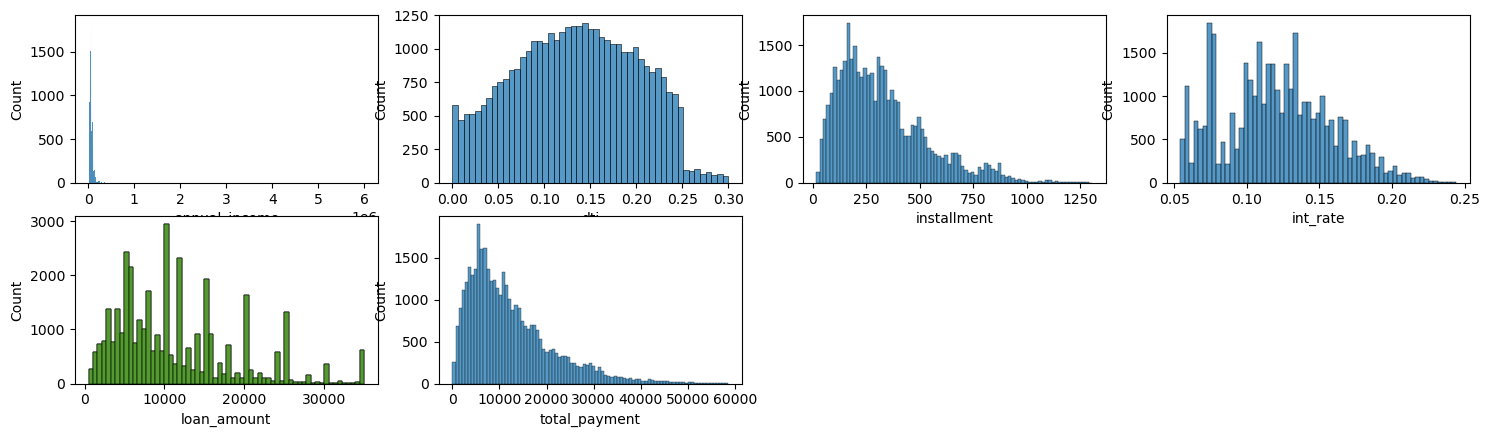

In [54]:
plt.rcParams['figure.figsize']=(18,10)

plt.subplot(4,4,1)
sns.histplot(bank_loan['annual_income'])

plt.subplot(4,4,2)
sns.histplot(bank_loan['dti'])

plt.subplot(4,4,3)
sns.histplot(bank_loan['installment'])

plt.subplot(4,4,4)
sns.histplot(bank_loan['int_rate'])

plt.subplot(4,4,5)
sns.histplot(bank_loan['loan_amount'])

plt.subplot(4,4,6)
sns.histplot(bank_loan['total_payment'])

plt.subplot(4,4,5)
sns.histplot(bank_loan['loan_amount'])

plt.subplot(4,4,5)
sns.histplot(bank_loan['loan_amount'])

plt.show()

<Axes: >

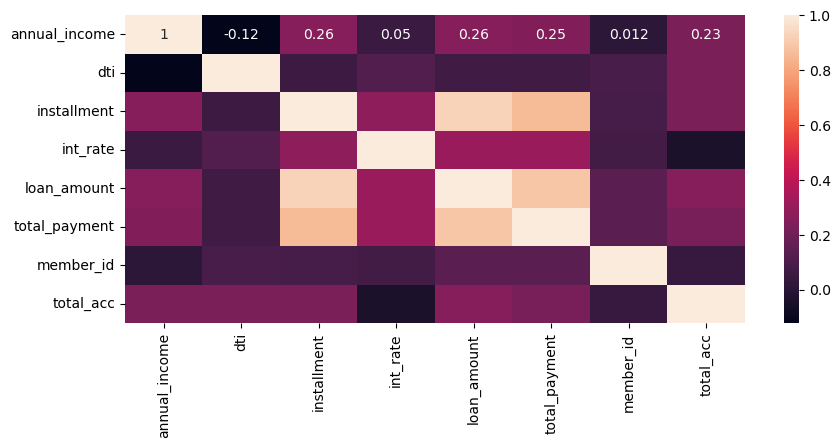

In [55]:
plt.rcParams['figure.figsize']=(10,4)
sns.heatmap(bank_loan[continuous].corr(),annot=True)

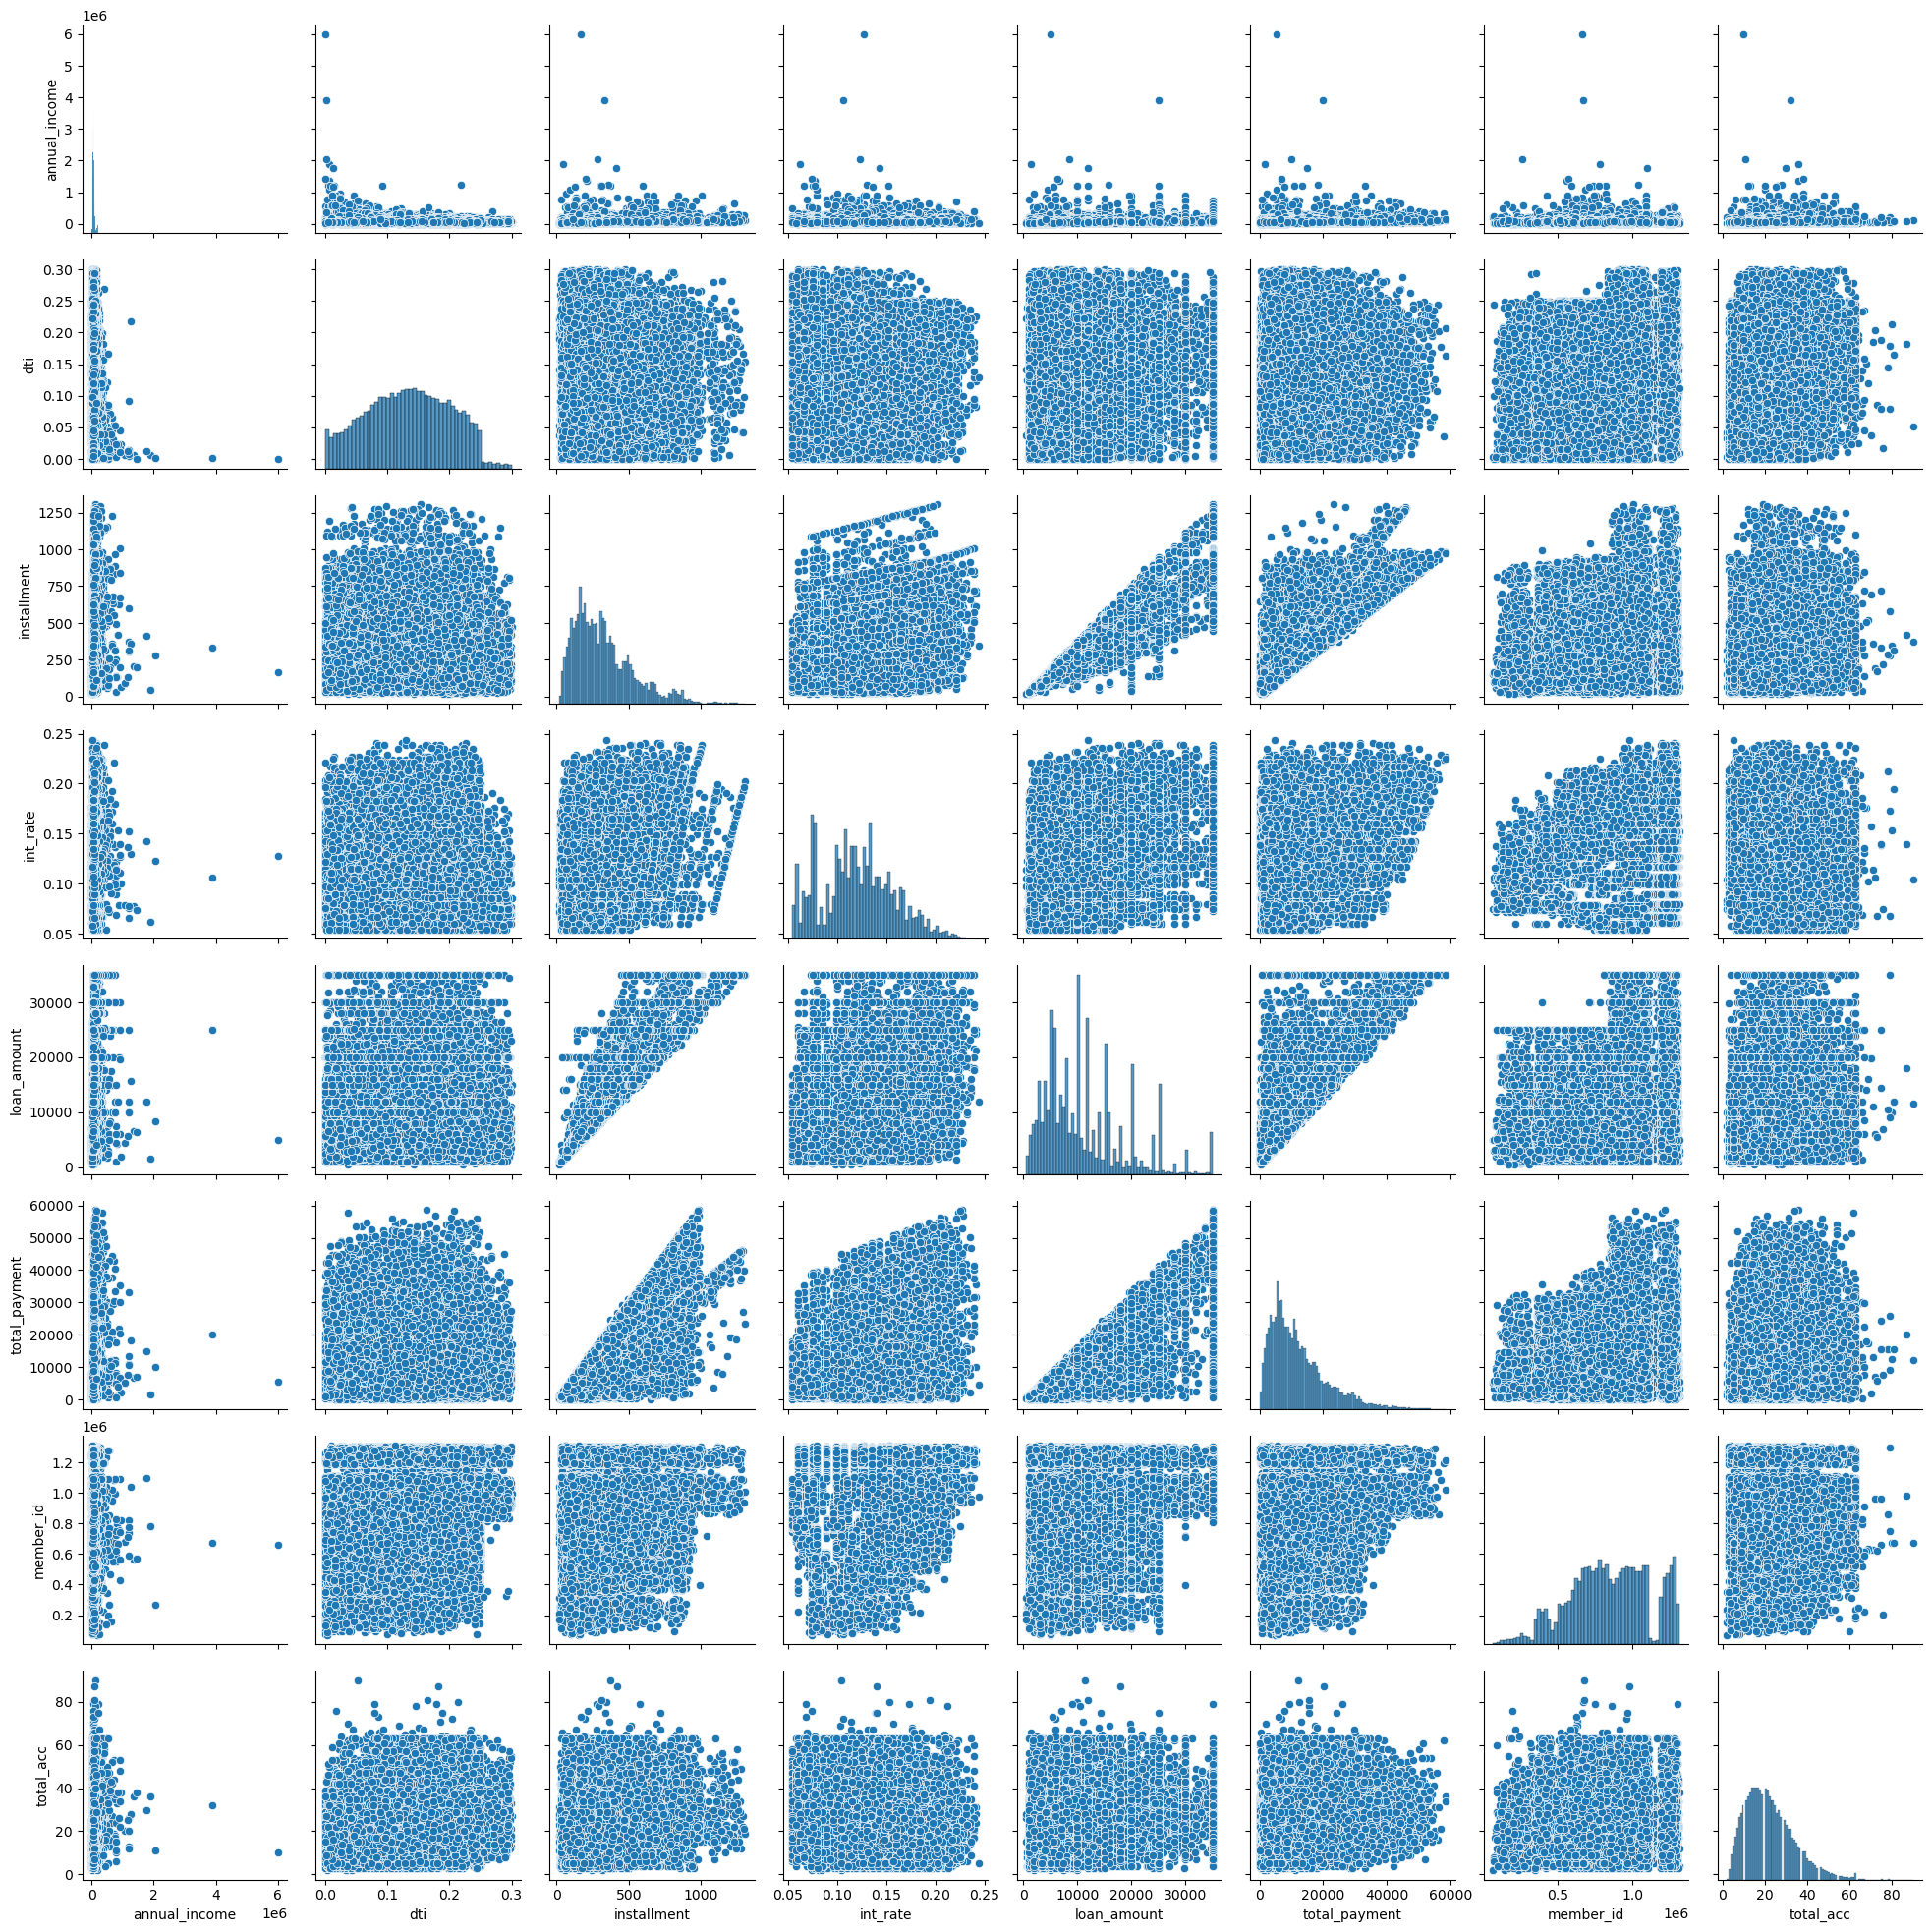

In [56]:
sns.pairplot(bank_loan[continuous])
plt.show()

In [57]:
bank_loan[continuous].skew()

annual_income    32.230920
dti              -0.040241
installment       1.112212
int_rate          0.287541
loan_amount       1.047469
total_payment     1.330050
member_id        -0.206450
total_acc         0.817557
dtype: float64

**discreate_categorical**

In [58]:
bank_loan[discreate_categorical].describe()

,address_state,emp_length,emp_title,term,purpose,home_ownership
count,37138,37138,37138,37138,37138,37138
unique,50,11,28525,2,14,5
top,CA,10+ years,US Army,36 months,Debt consolidation,RENT
freq,6622,8527,135,27077,17762,17858


In [59]:
bank_loan.to_csv('bank_loan.csv')

In [64]:
bank_loan['address_state'].value_counts()

address_state
CA    6622
NY    3576
FL    2668
TX    2564
NJ    1760
IL    1438
PA    1429
VA    1328
GA    1315
MA    1256
OH    1157
MD     998
AZ     796
WA     764
NC     733
CO     730
CT     688
MI     665
MO     633
MN     573
NV     464
SC     442
WI     423
AL     420
OR     418
LA     407
KY     308
OK     285
KS     252
UT     240
AR     229
DC     210
RI     191
NM     172
HI     163
WV     161
NH     154
DE     108
WY      79
AK      76
MT      73
SD      59
VT      50
MS      18
TN      16
IN       9
ID       5
NE       5
IA       5
ME       3
Name: count, dtype: int64